In [1]:
# required Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import norm, iqr

In [2]:
# Set Nature-like plots
import matplotlib as mpl
# Figure size
mpl.rcParams['figure.figsize'] = 6.2, 5.0
# Set x axis
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
# Set y axis
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
# Font sizes
mpl.rcParams['axes.labelsize'] = 19
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['font.size'] = 17
# Font Family
#mpl.rcParams['font.family'] = 'Open Sans'
# Set line widths
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 12
# Remove legend frame
mpl.rcParams['legend.frameon'] = False

In [3]:
dataset = pd.read_csv('output/2024-04-13_step7_lamb1987_noise_datapoints.csv')
dataset2 = pd.read_csv('output/2024-04-18_step7_lamb1987_noise_datapoints.csv')
dataset3 = pd.read_csv('output/2024-04-19_step7_lamb1987_noise_datapoints2.csv')
dataset

,Euler1,Euler2,Euler3,n14,n14_noise,n16,n16_noise,n20,n20_noise,n24,n24_noise
0,0,0,0,0.000,3.914,0.000,7.982,0.000,6.545,0.284,3.623
1,0,0,7,0.000,14.189,0.000,6.546,0.000,2.591,0.270,14.267
2,0,0,14,0.000,16.350,0.044,0.672,0.000,13.638,0.229,6.981
3,0,0,21,0.000,1.026,0.000,9.955,0.000,0.855,0.000,9.528
4,0,0,28,0.000,6.833,0.352,11.441,0.000,12.312,0.234,5.038
...,...,...,...,...,...,...,...,...,...,...,...
4389,84,84,147,0.009,5.198,0.015,8.111,0.011,4.389,0.008,7.609
4390,84,84,154,0.008,4.872,0.013,6.922,0.008,6.923,0.008,9.032
4391,84,84,161,0.010,6.252,0.009,5.302,0.012,2.806,0.010,8.651
4392,84,84,168,0.010,4.294,0.011,6.530,0.009,7.324,0.010,7.166


**dataset1**:  
std_T = 0.03  
std_azimuths = 0.5  

**dataset2**:  
std_T = 0.03  
std_azimuths = 0.25

**dataset3**:  
std_T = 0.015  
std_azimuths = 0.5

In [4]:
dataset[['n14', 'n14_noise', 'n16', 'n16_noise', 'n20', 'n20_noise', 'n24', 'n24_noise']].describe()

,n14,n14_noise,n16,n16_noise,n20,n20_noise,n24,n24_noise
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000
mean,0.033167,5.560786,0.032281,5.298985,0.029446,4.841990,0.026013,4.528233
std,0.184988,3.742303,0.216980,3.581797,0.154842,3.380078,0.089004,3.279402
min,0.000000,0.004000,0.000000,0.009000,0.000000,0.009000,0.000000,0.059000
25%,0.003000,2.812000,0.002000,2.620250,0.002250,2.308000,0.002000,2.125000
50%,0.005000,4.640500,0.004000,4.368500,0.004000,3.959000,0.004000,3.608000
75%,0.011000,7.300750,0.010000,7.042750,0.010000,6.603500,0.009000,6.190750
max,6.963000,29.315000,9.456000,29.107000,4.566000,24.810000,2.156000,26.112000


In [5]:
dataset2[['n14', 'n14_noise', 'n16', 'n16_noise', 'n20', 'n20_noise', 'n24', 'n24_noise']].describe()

,n14,n14_noise,n16,n16_noise,n20,n20_noise,n24,n24_noise
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000
mean,0.035179,5.437057,0.026577,5.178104,0.026883,4.864650,0.024728,4.505829
std,0.211751,3.690428,0.116051,3.520040,0.105450,3.430917,0.108196,3.214235
min,0.000000,0.006000,0.000000,0.013000,0.000000,0.015000,0.000000,0.026000
25%,0.003000,2.725250,0.002000,2.564250,0.003000,2.320000,0.002000,2.189250
50%,0.005000,4.549500,0.004000,4.358500,0.004000,4.004500,0.004000,3.618500
75%,0.011000,7.073750,0.010000,6.947250,0.010000,6.685500,0.009000,6.086750
max,8.975000,27.931000,2.923000,24.995000,3.517000,30.783000,4.938000,27.303000


In [6]:
dataset3[['n14', 'n14_noise', 'n16', 'n16_noise', 'n20', 'n20_noise', 'n24', 'n24_noise']].describe()

,n14,n14_noise,n16,n16_noise,n20,n20_noise,n24,n24_noise
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000
mean,0.030134,3.226496,0.027723,3.156962,0.029225,2.871230,0.027764,2.757843
std,0.148653,2.524908,0.125815,2.520365,0.177930,2.331134,0.145089,2.349803
min,0.000000,0.006000,0.000000,0.005000,0.000000,0.002000,0.000000,0.004000
25%,0.003000,1.417500,0.002000,1.374250,0.002000,1.223250,0.002000,1.100250
50%,0.005000,2.411500,0.004000,2.324000,0.004000,2.080500,0.004000,1.892500
75%,0.011000,4.363250,0.010000,4.244000,0.010000,3.884250,0.009000,3.754000
max,6.121000,17.574000,5.366000,18.107000,8.680000,17.846000,5.879000,17.811000


## Visualize distributions

### Dataset 1

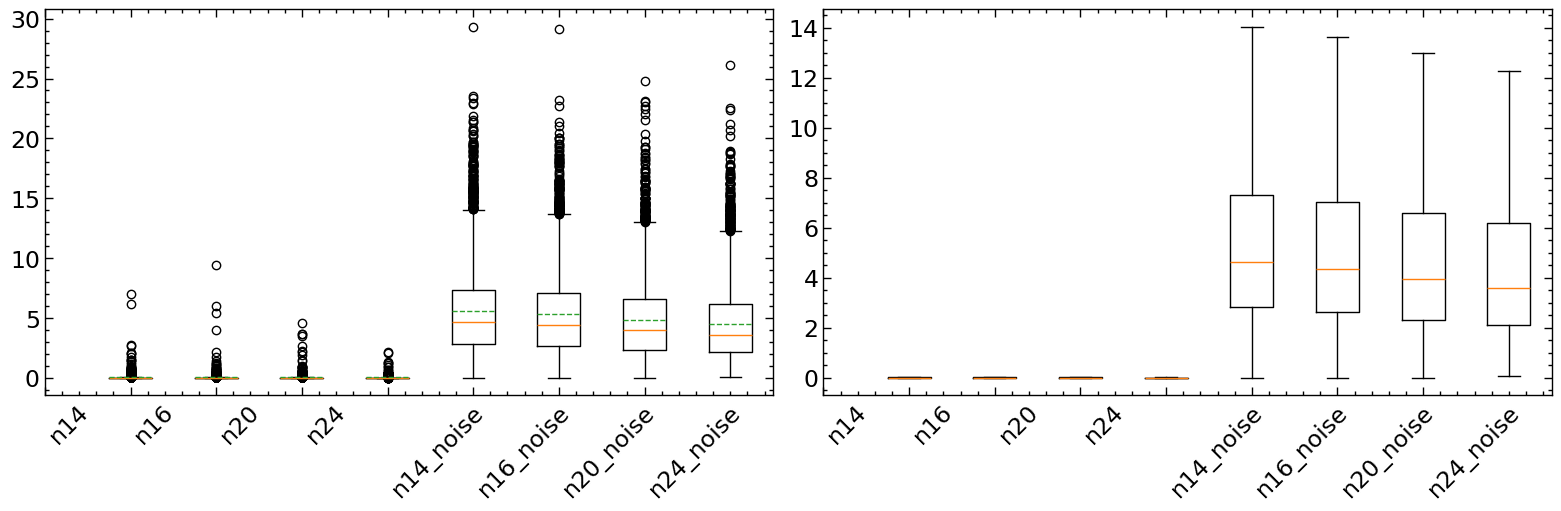

In [7]:
labels = ['n14', 'n16', 'n20', 'n24', 'n14_noise', 'n16_noise', 'n20_noise', 'n24_noise']

fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5*3.1,5), constrained_layout=True)

ax1.boxplot(dataset[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(8), labels, rotation=45, ha='left') 

ax2.boxplot(dataset[labels], showfliers=False, labels=labels)
_ = ax2.set_xticks(np.arange(8), labels, rotation=45, ha='left') 


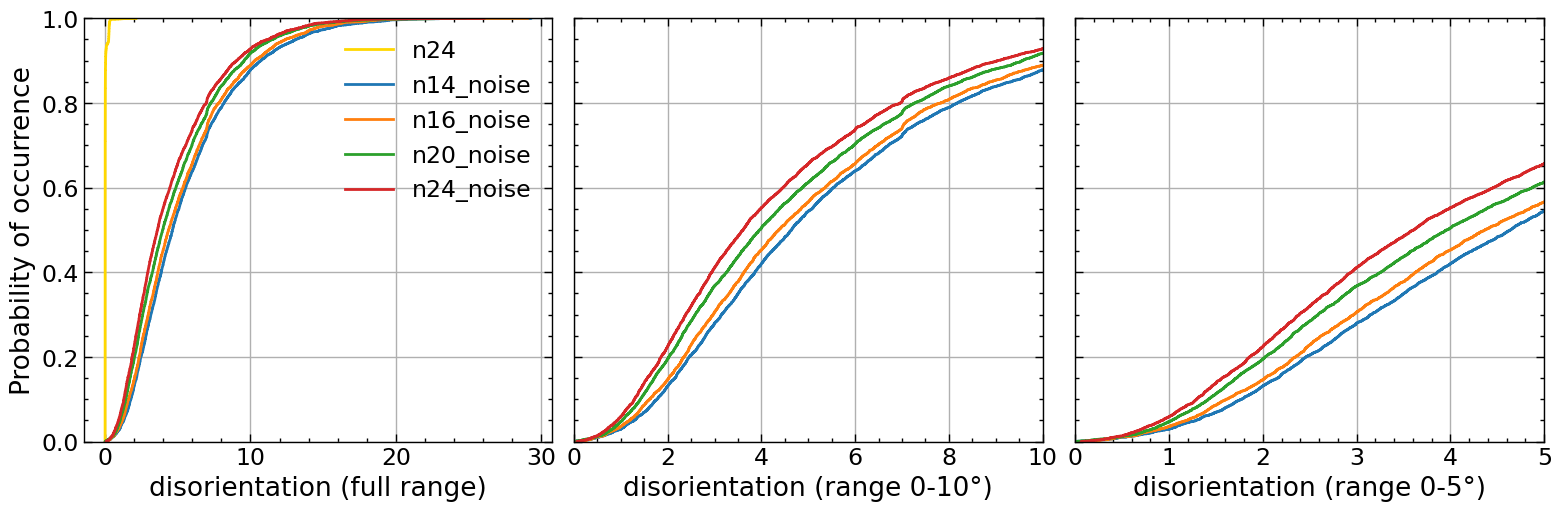

In [8]:
fig2, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5*3.1, 5), sharey=True, constrained_layout=True)

ax1.ecdf(dataset['n24'], label='n24', color='gold')
ax1.ecdf(dataset['n14_noise'], label='n14_noise')
ax1.ecdf(dataset['n16_noise'], label='n16_noise')
ax1.ecdf(dataset['n20_noise'], label='n20_noise')
ax1.ecdf(dataset['n24_noise'], label='n24_noise')
ax1.grid(True)
ax1.set_xlabel('disorientation (full range)')
ax1.set_ylabel("Probability of occurrence")
ax1.legend(loc='best')

ax2.ecdf(dataset['n14_noise'], label='n14_noise')
ax2.ecdf(dataset['n16_noise'], label='n16_noise')
ax2.ecdf(dataset['n20_noise'], label='n20_noise')
ax2.ecdf(dataset['n24_noise'], label='n24_noise')
ax2.set_xlim(left=0, right=10)
ax2.grid(True)
ax2.set_xlabel('disorientation (range 0-10°)')

ax3.ecdf(dataset['n14_noise'], label='n14_noise')
ax3.ecdf(dataset['n16_noise'], label='n16_noise')
ax3.ecdf(dataset['n20_noise'], label='n20_noise')
ax3.ecdf(dataset['n24_noise'], label='n24_noise')
ax3.set_xlim(left=0, right=5)
ax3.set_xlabel('disorientation (range 0-5°)')
_ = ax3.grid(True)

### Dataset 2

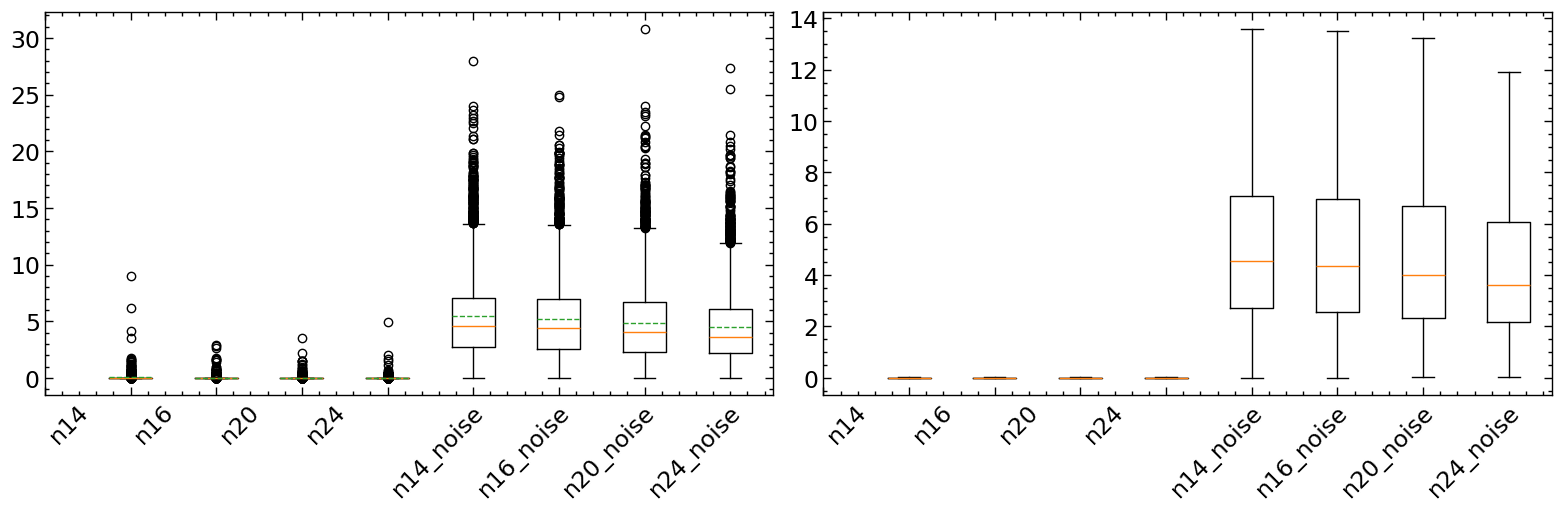

In [9]:
fig3, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5*3.1,5), constrained_layout=True)

ax1.boxplot(dataset2[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(8), labels, rotation=45, ha='left') 

ax2.boxplot(dataset2[labels], showfliers=False, labels=labels)
_ = ax2.set_xticks(np.arange(8), labels, rotation=45, ha='left') 

### Dataset 3

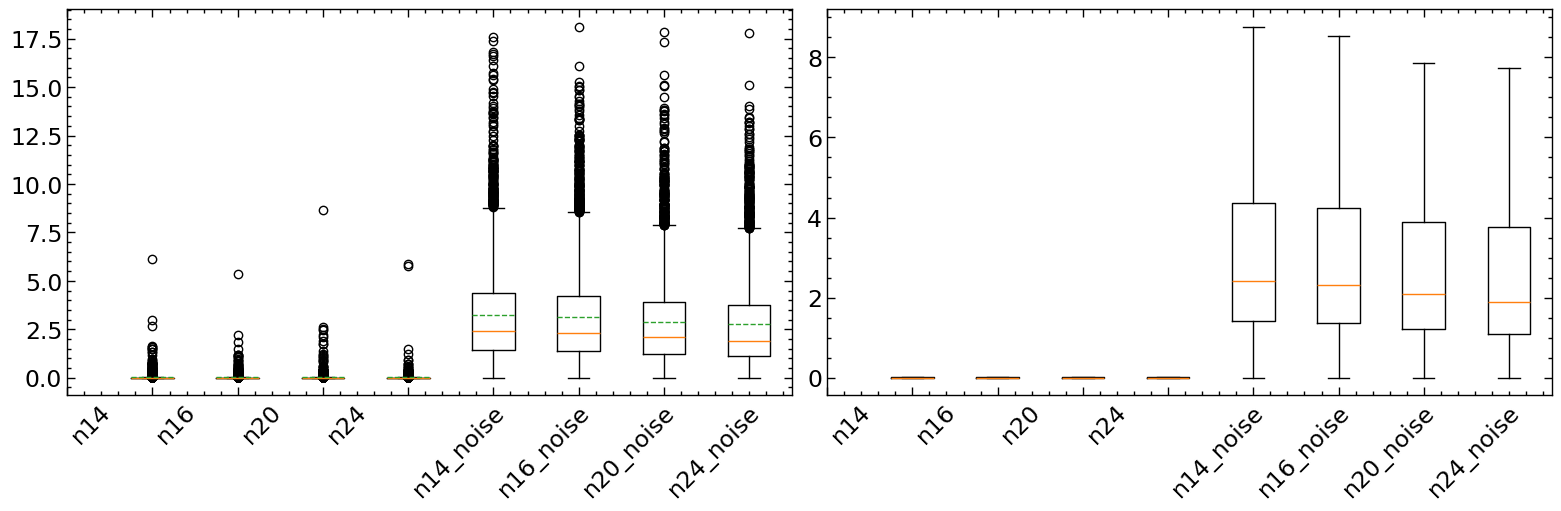

In [10]:
fig4, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5*3.1,5), constrained_layout=True)

ax1.boxplot(dataset3[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(8), labels, rotation=45, ha='left') 

ax2.boxplot(dataset3[labels], showfliers=False, labels=labels)
_ = ax2.set_xticks(np.arange(8), labels, rotation=45, ha='left') 

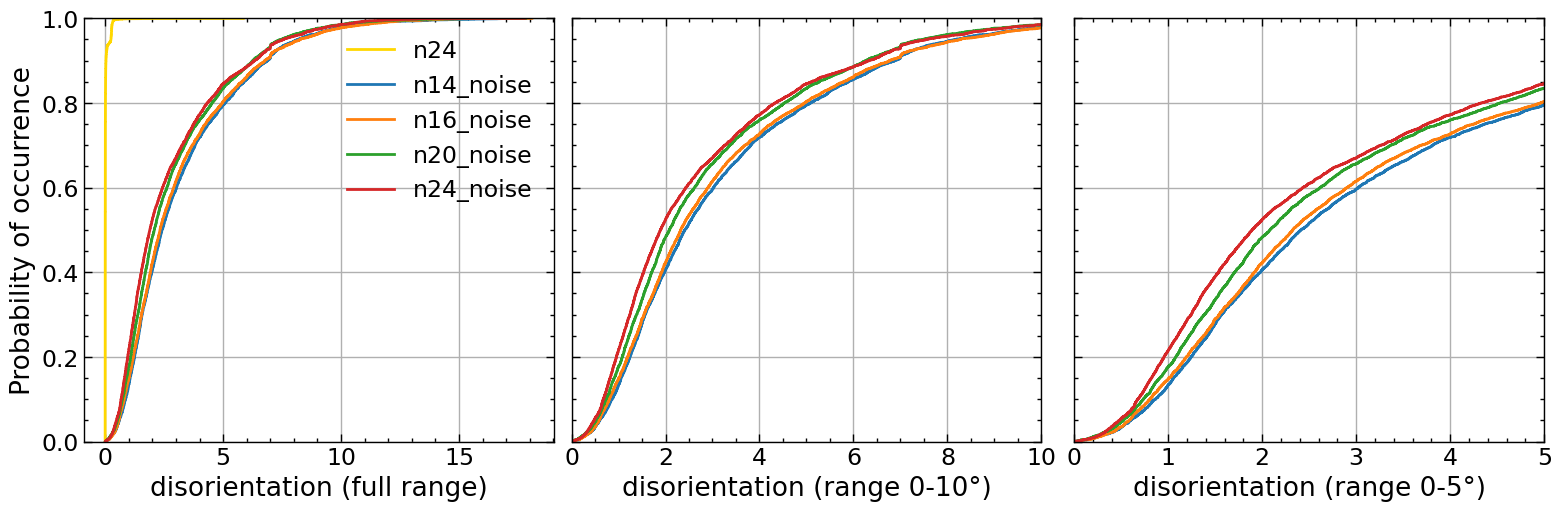

In [11]:
fig5, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5*3.1, 5), sharey=True, constrained_layout=True)

ax1.ecdf(dataset3['n24'], label='n24', color='gold')
ax1.ecdf(dataset3['n14_noise'], label='n14_noise')
ax1.ecdf(dataset3['n16_noise'], label='n16_noise')
ax1.ecdf(dataset3['n20_noise'], label='n20_noise')
ax1.ecdf(dataset3['n24_noise'], label='n24_noise')
ax1.grid(True)
ax1.set_xlabel('disorientation (full range)')
ax1.set_ylabel("Probability of occurrence")
ax1.legend(loc='best')

ax2.ecdf(dataset3['n14_noise'], label='n14_noise')
ax2.ecdf(dataset3['n16_noise'], label='n16_noise')
ax2.ecdf(dataset3['n20_noise'], label='n20_noise')
ax2.ecdf(dataset3['n24_noise'], label='n24_noise')
ax2.set_xlim(left=0, right=10)
ax2.grid(True)
ax2.set_xlabel('disorientation (range 0-10°)')

ax3.ecdf(dataset3['n14_noise'], label='n14_noise')
ax3.ecdf(dataset3['n16_noise'], label='n16_noise')
ax3.ecdf(dataset3['n20_noise'], label='n20_noise')
ax3.ecdf(dataset3['n24_noise'], label='n24_noise')
ax3.set_xlim(left=0, right=5)
ax3.set_xlabel('disorientation (range 0-5°)')
_ = ax3.grid(True)

### Comparison

In [12]:
comp = pd.concat(
    [
        dataset.loc[:, "n24_noise"],
        dataset2.loc[:, "n24_noise"],
        dataset3.loc[:, "n24_noise"],
    ],
    axis=1,
    ignore_index=True,
)
comp.columns = ["dataset1", "dataset2", "dataset3"]

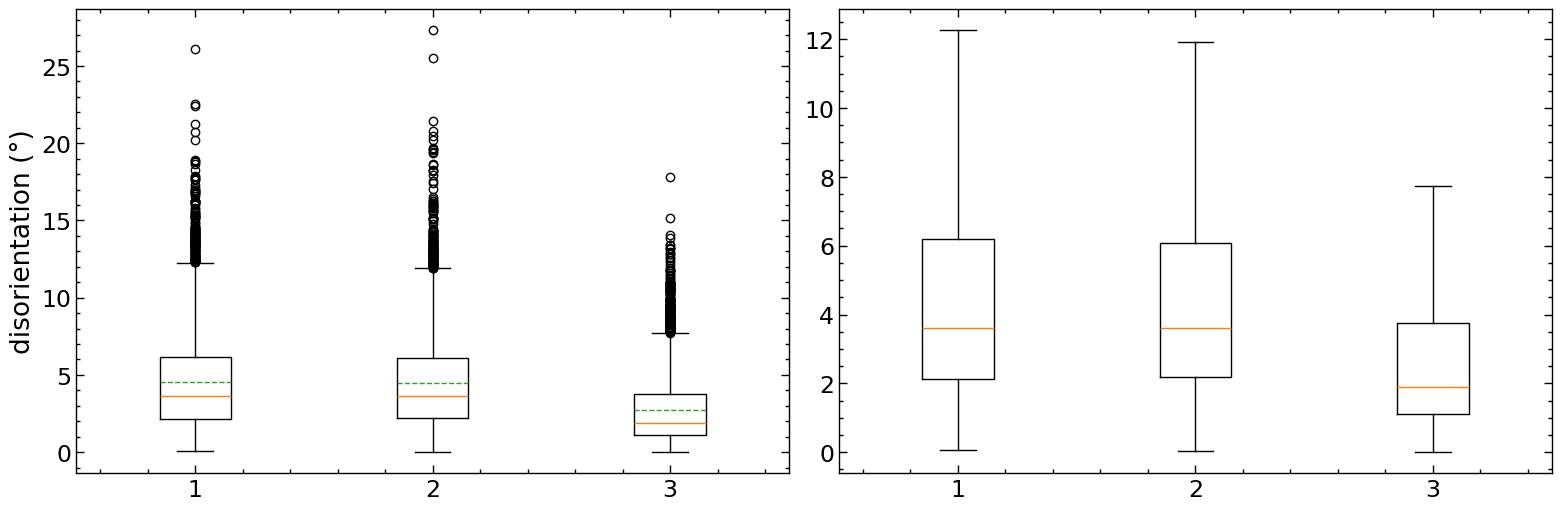

In [13]:
fig6, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5 * 3.1, 5), constrained_layout=True)

ax1.boxplot(comp, meanline=True, showmeans=True)
ax2.boxplot(comp, showfliers=False)

_ = ax1.set_ylabel("disorientation (°)")

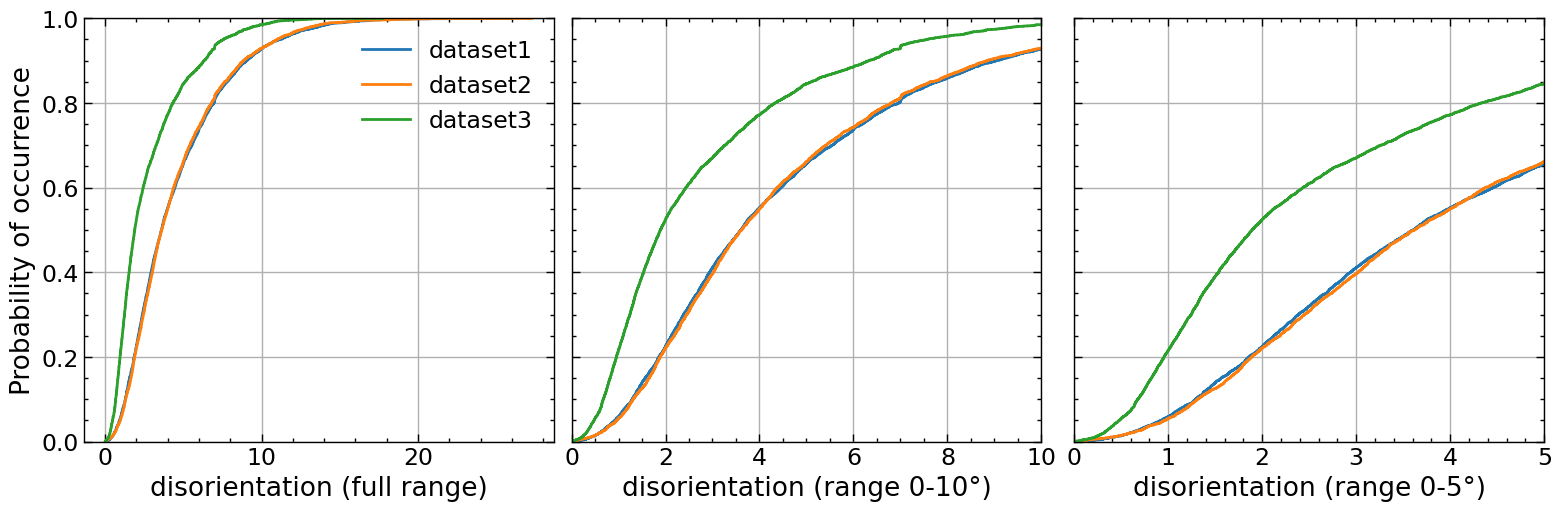

In [14]:
fig7, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5*3.1, 5), sharey=True, constrained_layout=True)

ax1.ecdf(dataset['n24_noise'], label='dataset1')
ax1.ecdf(dataset2['n24_noise'], label='dataset2')
ax1.ecdf(dataset3['n24_noise'], label='dataset3')
ax1.grid(True)
ax1.set_xlabel('disorientation (full range)')
ax1.set_ylabel("Probability of occurrence")
ax1.legend(loc='best')

ax2.ecdf(dataset['n24_noise'])
ax2.ecdf(dataset2['n24_noise'])
ax2.ecdf(dataset3['n24_noise'])
ax2.set_xlim(left=0, right=10)
ax2.grid(True)
ax2.set_xlabel('disorientation (range 0-10°)')

ax3.ecdf(dataset['n24_noise'])
ax3.ecdf(dataset2['n24_noise'])
ax3.ecdf(dataset3['n24_noise'])
ax3.set_xlim(left=0, right=5)
ax3.set_xlabel('disorientation (range 0-5°)')
_ = ax3.grid(True)

In [15]:
def median_ci(pop, n, ci=0.95):
    """ Estimate the approximate ci 95% error margins for the median
    using a rule of thumb based on Hollander and Wolfe (1999).
    """

    z_score = norm.ppf(1 - (1 - ci) / 2)  # two-tailed z score

    id_upper = 1 + (n / 2) + (z_score * np.sqrt(n)) / 2
    id_lower = (n / 2) - (z_score * np.sqrt(n)) / 2

    if int(np.ceil(id_upper)) >= len(pop):
        upper_ci, lower_ci = pop[-1], pop[int(np.floor(id_lower))]
    else:
        upper_ci, lower_ci = pop[int(np.ceil(id_upper))], pop[int(np.floor(id_lower))]
    interval = upper_ci - lower_ci

    return (lower_ci, upper_ci), interval

def median(pop, ci=0.95):
    """ Returns the median, the interquartile length, and the confidence
    intervals for the median based on th rule-of-thumb method of Hollander
    and Wolfe (1999).
    """
    pop, n = np.sort(pop), len(pop)
    median, iqr_range = np.median(pop), iqr(pop)

    # compute confidence intervals
    ci_limits, length = median_ci(pop, n, ci)

    return median, iqr_range, ci_limits, length

In [16]:
mid14_samples, iqr14_samples, ci14_samples, length14_samples = median(dataset['n14_noise'])
mid16_samples, iqr16_samples, ci16_samples, length16_samples = median(dataset['n16_noise'])
mid20_samples, iqr20_samples, ci20_samples, length20_samples = median(dataset['n20_noise'])
mid24_samples, iqr24_samples, ci24_samples, length24_samples = median(dataset['n24_noise'])

mid14_samples2, iqr14_samples2, ci14_samples2, length14_samples2 = median(dataset2['n14_noise'])
mid16_samples2, iqr16_samples2, ci16_samples2, length16_samples2 = median(dataset2['n16_noise'])
mid20_samples2, iqr20_samples2, ci20_samples2, length20_samples2 = median(dataset2['n20_noise'])
mid24_samples2, iqr24_samples2, ci24_samples2, length24_samples2 = median(dataset2['n24_noise'])

mid14_samples3, iqr14_samples3, ci14_samples3, length14_samples3 = median(dataset3['n14_noise'])
mid16_samples3, iqr16_samples3, ci16_samples3, length16_samples3 = median(dataset3['n16_noise'])
mid20_samples3, iqr20_samples3, ci20_samples3, length20_samples3 = median(dataset3['n20_noise'])
mid24_samples3, iqr24_samples3, ci24_samples3, length24_samples3 = median(dataset3['n24_noise'])


print('EVALUATION OF NOISE USING DISORIENTATION IN DEGREES (ROBUST APPROACH)')
print('')
print('14 datapoints (1 vs 2 vs 3)')
print(f'Medians: {mid14_samples:.2f} vs {mid14_samples2:.2f} vs {mid14_samples3:.2f}')
print(f'   IQRs: {iqr14_samples:.2f} vs {iqr14_samples2:.2f} vs {iqr14_samples3:.2f}')
print('')
print('16 datapoints')
print(f'Medians: {mid16_samples:.2f} vs {mid16_samples2:.2f} vs {mid16_samples3:.2f}')
print(f'   IQRs: {iqr16_samples:.2f} vs {iqr16_samples2:.2f} vs {iqr16_samples3:.2f}')
print('')
print('20 datapoints')
print(f'Medians: {mid20_samples:.2f} vs {mid20_samples2:.2f} vs {mid20_samples3:.2f}')
print(f'   IQRs: {iqr20_samples:.2f} vs {iqr20_samples2:.2f} vs {iqr20_samples3:.2f}')
print('')
print('24 datapoints')
print(f'Medians: {mid24_samples:.2f} vs {mid24_samples2:.2f} vs {mid24_samples3:.2f}')
print(f'   IQRs: {iqr24_samples:.2f} vs {iqr24_samples2:.2f} vs {iqr24_samples3:.2f}')
print('')

EVALUATION OF NOISE USING DISORIENTATION IN DEGREES (ROBUST APPROACH)

14 datapoints (1 vs 2 vs 3)
Medians: 4.64 vs 4.55 vs 2.41
   IQRs: 4.49 vs 4.35 vs 2.95

16 datapoints
Medians: 4.37 vs 4.36 vs 2.32
   IQRs: 4.42 vs 4.38 vs 2.87

20 datapoints
Medians: 3.96 vs 4.00 vs 2.08
   IQRs: 4.30 vs 4.37 vs 2.66

24 datapoints
Medians: 3.61 vs 3.62 vs 1.89
   IQRs: 4.07 vs 3.90 vs 2.65



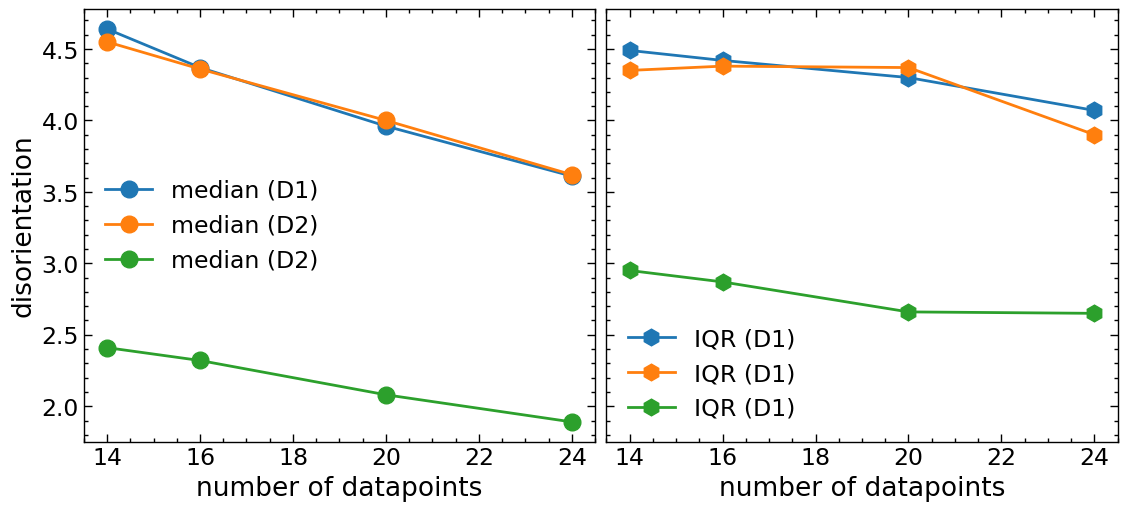

In [17]:
fig8, (ax1, ax2) = plt.subplots(figsize=(1.8*6.2, 5.0), ncols=2, sharey=True, constrained_layout=True)

ax1.plot([14, 16, 20, 24], [4.64, 4.37, 3.96, 3.61], 'o-', label='median (D1)')
ax1.plot([14, 16, 20, 24], [4.55, 4.36, 4.00, 3.62], 'o-', label='median (D2)')
ax1.plot([14, 16, 20, 24], [2.41, 2.32, 2.08, 1.89], 'o-', label='median (D2)')

# ax.set_xticks([14, 16, 20, 24])  
ax1.set_ylabel('disorientation')
ax1.set_xlabel('number of datapoints')
ax1.legend(loc='best')

ax2.plot([14, 16, 20, 24], [4.49, 4.42, 4.30, 4.07], 'h-', label='IQR (D1)')
ax2.plot([14, 16, 20, 24], [4.35, 4.38, 4.37, 3.90], 'h-', label='IQR (D1)')
ax2.plot([14, 16, 20, 24], [2.95, 2.87, 2.66, 2.65], 'h-', label='IQR (D1)')
ax2.set_xlabel('number of datapoints')
ax2.legend(loc='best')

## Percent of wrong estimates

In [18]:
print('% of wrong estimates:')
print('')
print('DATAPOINTS = 14')
print(f"Percent above 1 degree (no noise): {100 * (dataset['n14'] > 1).mean():.2f} % (Reference)")
print(f"Percent above 1 degree (noise): {100 * (dataset['n14_noise'] > 1).mean():.2f} vs {100 * (dataset2['n14_noise'] > 1).mean():.2f} vs {100 * (dataset3['n14_noise'] > 1).mean():.2f}%")
print(f"Percent above 5 degree (noise): {100 * (dataset['n14_noise'] > 5).mean():.2f} vs {100 * (dataset2['n14_noise'] > 5).mean():.2f} vs {100 * (dataset3['n14_noise'] > 5).mean():.2f}%")
print(f"Percent above 10 degree (noise): {100 * (dataset['n14_noise'] > 10).mean():.2f} vs {100 * (dataset2['n14_noise'] > 10).mean():.2f} vs {100 * (dataset3['n14_noise'] > 10).mean():.2f}%")
print('')
print('DATAPOINTS = 16')
print(f"Percent above 1 degree (no noise): {100 * (dataset['n16'] > 1).mean():.2f} % (Reference)")
print(f"Percent above 1 degree (noise): {100 * (dataset['n16_noise'] > 1).mean():.2f} vs {100 * (dataset2['n16_noise'] > 1).mean():.2f} vs {100 * (dataset3['n16_noise'] > 1).mean():.2f}%")
print(f"Percent above 5 degree (noise): {100 * (dataset['n16_noise'] > 5).mean():.2f} vs {100 * (dataset2['n16_noise'] > 5).mean():.2f} vs {100 * (dataset3['n16_noise'] > 5).mean():.2f}%")
print(f"Percent above 10 degree (noise): {100 * (dataset['n16_noise'] > 10).mean():.2f} vs {100 * (dataset2['n16_noise'] > 10).mean():.2f} vs {100 * (dataset3['n16_noise'] > 10).mean():.2f}%")
print('')
print('DATAPOINTS = 20')
print(f"Percent above 1 degree (no noise): {100 * (dataset['n20'] > 1).mean():.2f} % (Reference)")
print(f"Percent above 1 degree (noise): {100 * (dataset['n20_noise'] > 1).mean():.2f} vs {100 * (dataset2['n20_noise'] > 1).mean():.2f} vs {100 * (dataset3['n20_noise'] > 1).mean():.2f}%")
print(f"Percent above 5 degree (noise): {100 * (dataset['n20_noise'] > 5).mean():.2f} vs {100 * (dataset2['n20_noise'] > 5).mean():.2f} vs {100 * (dataset3['n20_noise'] > 5).mean():.2f}%")
print(f"Percent above 10 degree (noise): {100 * (dataset['n20_noise'] > 10).mean():.2f} vs {100 * (dataset2['n20_noise'] > 10).mean():.2f} vs {100 * (dataset3['n20_noise'] > 10).mean():.2f}%")
print('')
print('DATAPOINTS = 24')
print(f"Percent above 1 degree (no noise): {100 * (dataset['n24'] > 1).mean():.2f} % (Reference)")
print(f"Percent above 1 degree (noise): {100 * (dataset['n24_noise'] > 1).mean():.2f} vs {100 * (dataset2['n24_noise'] > 1).mean():.2f} vs {100 * (dataset3['n24_noise'] > 1).mean():.2f}%")
print(f"Percent above 5 degree (noise): {100 * (dataset['n24_noise'] > 5).mean():.2f} vs {100 * (dataset2['n24_noise'] > 5).mean():.2f} vs {100 * (dataset3['n24_noise'] > 5).mean():.2f}%")
print(f"Percent above 10 degree (noise): {100 * (dataset['n24_noise'] > 10).mean():.2f} vs {100 * (dataset2['n24_noise'] > 10).mean():.2f} vs {100 * (dataset3['n24_noise'] > 10).mean():.2f}%")


% of wrong estimates:

DATAPOINTS = 14
Percent above 1 degree (no noise): 0.32 % (Reference)
Percent above 1 degree (noise): 97.04 vs 96.70 vs 86.53%
Percent above 5 degree (noise): 45.56 vs 44.38 vs 20.48%
Percent above 10 degree (noise): 12.20 vs 11.81 vs 2.09%

DATAPOINTS = 16
Percent above 1 degree (no noise): 0.25 % (Reference)
Percent above 1 degree (noise): 96.43 vs 95.97 vs 85.28%
Percent above 5 degree (noise): 43.42 vs 41.90 vs 19.66%
Percent above 10 degree (noise): 11.11 vs 10.42 vs 2.28%

DATAPOINTS = 20
Percent above 1 degree (no noise): 0.25 % (Reference)
Percent above 1 degree (noise): 95.27 vs 95.06 vs 82.34%
Percent above 5 degree (noise): 38.73 vs 38.60 vs 16.59%
Percent above 10 degree (noise): 8.24 vs 8.31 vs 1.48%

DATAPOINTS = 24
Percent above 1 degree (no noise): 0.14 % (Reference)
Percent above 1 degree (noise): 94.06 vs 94.54 vs 78.47%
Percent above 5 degree (noise): 34.30 vs 33.84 vs 15.41%
Percent above 10 degree (noise): 7.21 vs 7.08 vs 1.46%


Text(0.5, 0, 'number of datapoints')

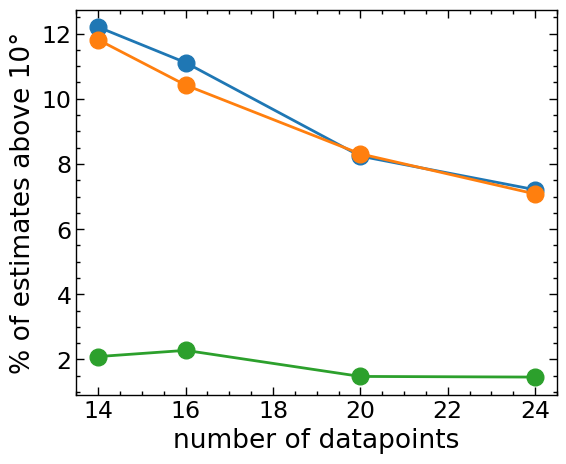

In [22]:
fig9, ax = plt.subplots()

ax.plot([14, 16, 20, 24], [12.20, 11.11, 8.24, 7.21], 'o-', label='D1')
ax.plot([14, 16, 20, 24], [11.81, 10.42, 8.31, 7.08], 'o-', label='D2')
ax.plot([14, 16, 20, 24], [2.09, 2.28, 1.48, 1.46], 'o-', label='D3')
ax.set_ylabel('% of estimates above 10°')
ax.set_xlabel('number of datapoints')

In [21]:
dataset[dataset3['n24_noise'] > 10]

,Euler1,Euler2,Euler3,n14,n14_noise,n16,n16_noise,n20,n20_noise,n24,n24_noise
11,0,0,77,0.000,15.407,0.000,5.146,0.329,5.370,0.000,7.020
12,0,0,84,0.000,0.766,0.294,3.840,0.000,11.914,0.000,4.961
18,0,0,126,0.000,6.928,0.381,2.535,0.000,10.893,0.000,0.829
19,0,0,133,0.000,17.650,0.000,8.726,0.278,7.346,0.267,10.176
343,7,0,35,0.278,8.818,0.000,14.430,0.000,17.886,0.000,6.813
...,...,...,...,...,...,...,...,...,...,...,...
4067,84,0,77,0.000,16.633,0.402,13.879,0.000,15.042,0.000,16.237
4069,84,0,91,0.000,19.319,0.284,8.733,0.292,15.470,0.261,15.118
4087,84,7,35,0.083,9.045,0.011,3.684,0.085,7.168,0.012,8.378
4170,84,28,70,0.074,9.935,0.027,4.305,0.012,1.934,0.004,3.126
